In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\dell\Desktop\MyDocs\Docs\MK\penguins_size.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
df = df.drop(columns = ['species', 'island'])
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df.shape

(344, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                334 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [6]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [7]:
df.isnull().sum()

culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [8]:
df['culmen_length_mm'] = df['culmen_length_mm'].fillna(df['culmen_length_mm'].mean())
df['culmen_depth_mm'] = df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].mean())
df['flipper_length_mm'] = df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean())
df['body_mass_g'] = df['body_mass_g'].fillna(df['body_mass_g'].mean())
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])

df.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

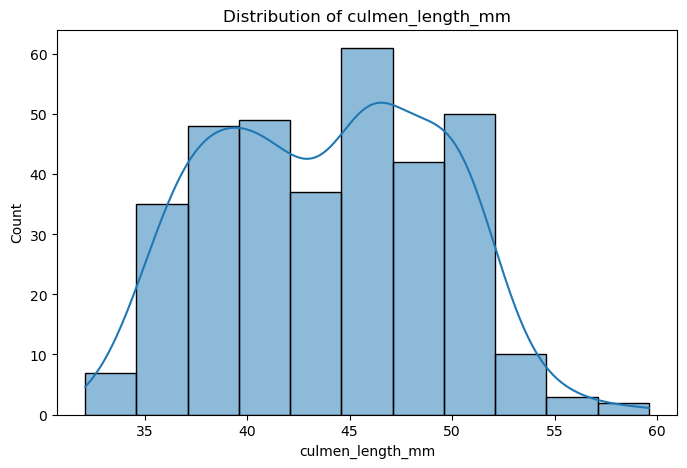

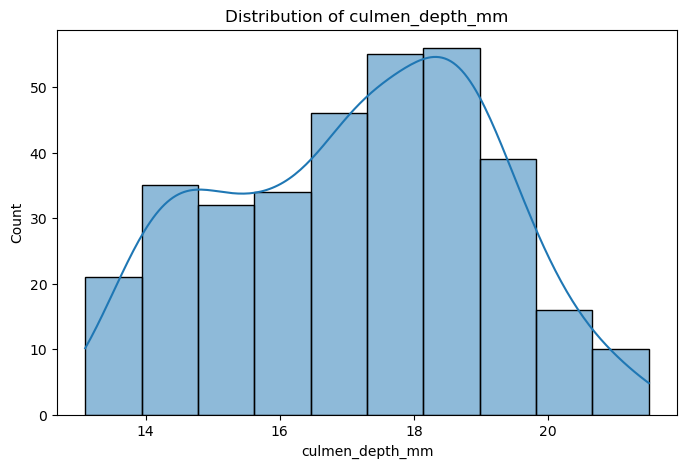

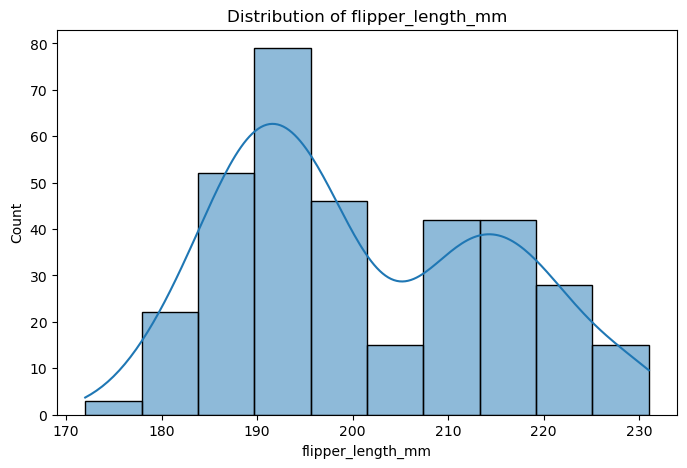

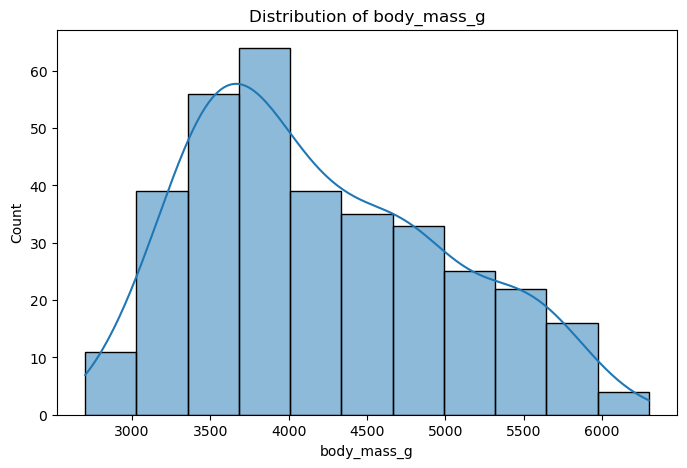

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical = df.select_dtypes(include = ['float64']).columns

for feature in numerical:
    plt.figure(figsize=(8,5))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

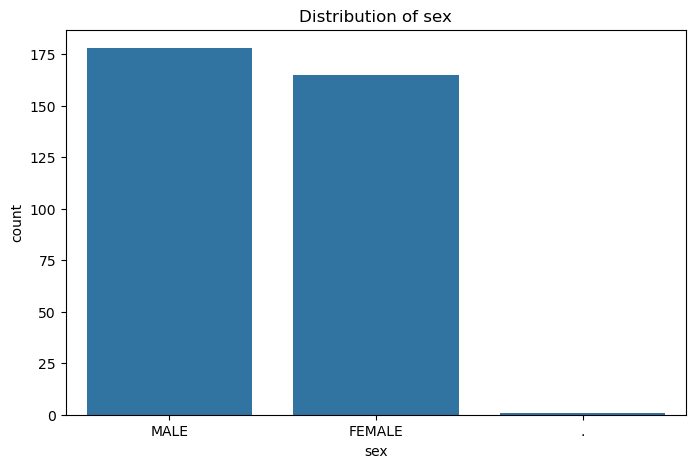

In [10]:
categorical = df.select_dtypes(include= ['object']).columns

for feature in categorical:
    plt.figure(figsize=(8,5))
    sns.countplot(data= df, x=feature)
    plt.title(f"Distribution of {feature}")
    plt.show()

In [11]:
df[df['sex'] == '.']

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,44.5,15.7,217.0,4875.0,.


In [12]:
df = df.drop([336])

In [13]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.10000,18.70000,181.000000,3750.000000,MALE
1,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,43.92193,17.15117,200.915205,4201.754386,MALE
4,36.70000,19.30000,193.000000,3450.000000,FEMALE


In [14]:
df = pd.get_dummies(df, columns=['sex'])
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.10000,18.70000,181.000000,3750.000000,False,True
1,39.50000,17.40000,186.000000,3800.000000,True,False
2,40.30000,18.00000,195.000000,3250.000000,True,False
3,43.92193,17.15117,200.915205,4201.754386,False,True
4,36.70000,19.30000,193.000000,3450.000000,True,False


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])

df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.885496,0.785072,-1.419809,-0.563095,-0.962791,0.962791
1,-0.812015,0.124322,-1.062504,-0.500500,1.038647,-1.038647
2,-0.665052,0.429284,-0.419355,-1.189047,1.038647,-1.038647
3,0.000310,-0.002150,0.003351,0.002457,-0.962791,0.962791
4,-1.326384,1.090033,-0.562277,-0.938666,1.038647,-1.038647


In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df = pd.DataFrame(pca.fit_transform(df), columns= ['PC1', 'PC2'])
df.head()

,PC1,PC2
0,-0.782729,2.054532
1,-1.926176,-0.499019
2,-1.955209,-0.404214
3,0.723124,0.976589
4,-2.298927,0.055811


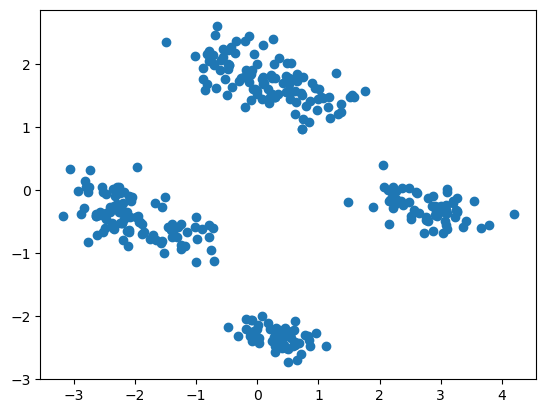

In [17]:
plt.scatter(df['PC1'], df['PC2'])
plt.show()

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

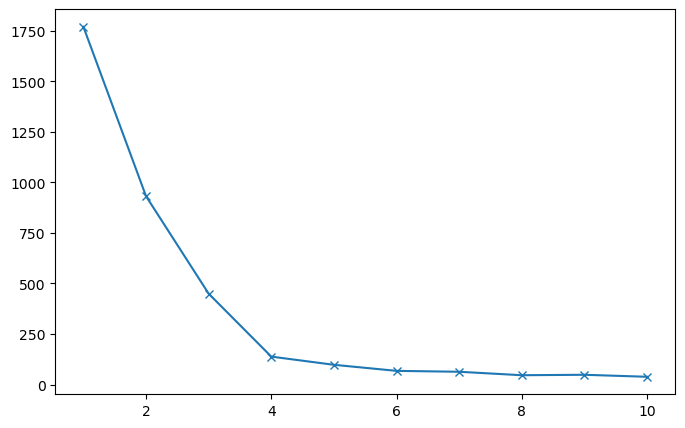

In [18]:
from sklearn.cluster import KMeans

elbow = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans = kmeans.fit(df)
    elbow.append(kmeans.inertia_)
    
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), elbow, marker='x')
plt.show()

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

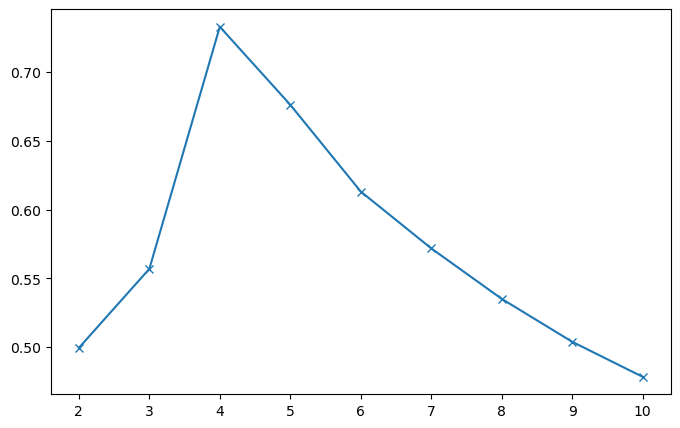

In [19]:
from sklearn.metrics import silhouette_score

sil = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans = kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    sil.append(score)
    
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), sil, marker='x')
plt.show()

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


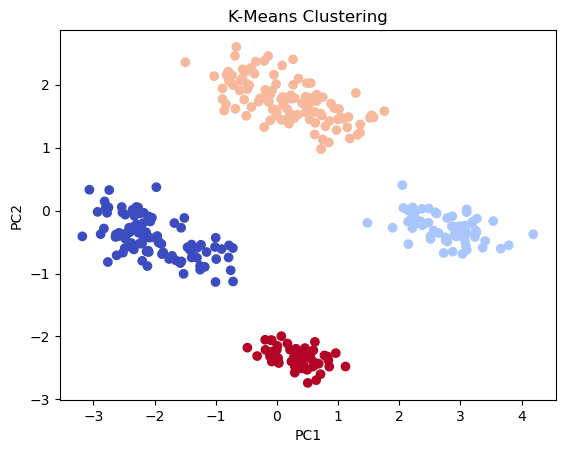

In [20]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(df)

plt.scatter(df['PC1'], df['PC2'], c=kmeans.labels_, cmap='coolwarm')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clustering')
plt.show()

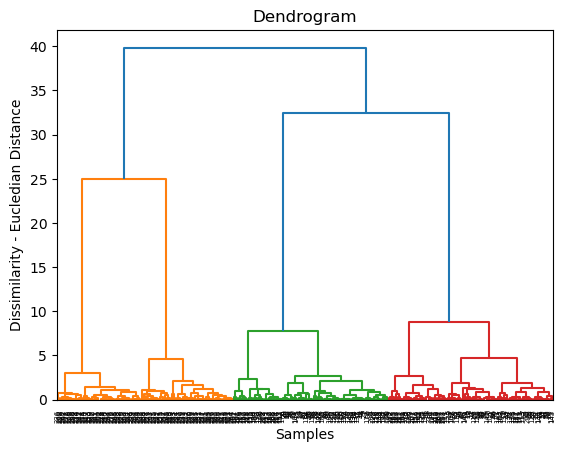

In [21]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(df, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Dissimilarity - Eucledian Distance')
plt.show()

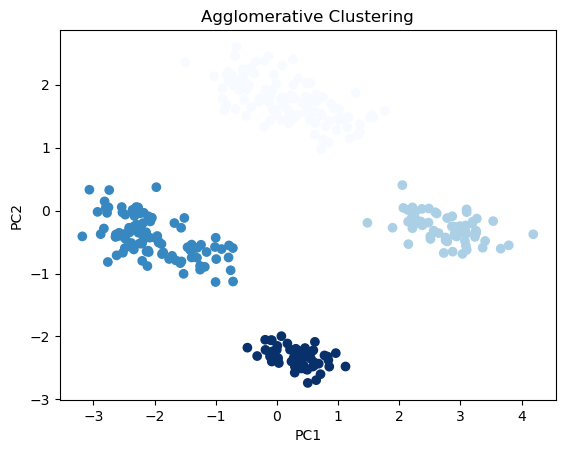

In [22]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
y_hc = hc.fit(df)

plt.scatter(df['PC1'], df['PC2'], c = hc.labels_, cmap ='Blues')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(f"Agglomerative Clustering")
plt.show()

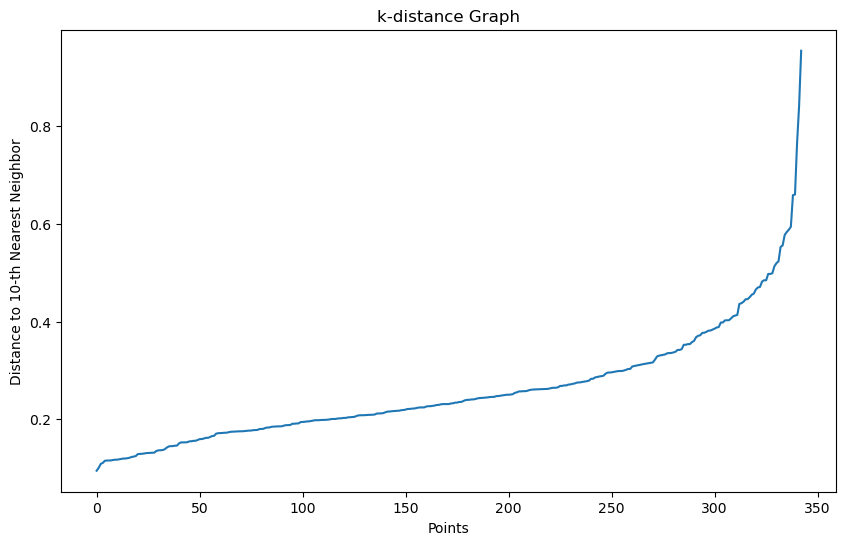

In [23]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

# Choose the value of k as min_samples
k = 10
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(df)
distances, indices = neighbors_fit.kneighbors(df)

# Sort and plot the distances to find the "elbow"
distances = np.sort(distances[:, k-1], axis=0)
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('k-distance Graph')
plt.xlabel('Points')
plt.ylabel(f'Distance to {k}-th Nearest Neighbor')
plt.show()

In [24]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.6, min_samples=10).fit(df)

db_clusters = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)  #label=-1 for noise
db_noise = list(db.labels_).count(-1)

print(f"Estimated number of clusters: {db_clusters}")
print(f"Estimated number of noise points: {db_noise}")

Estimated number of clusters: 4
Estimated number of noise points: 0


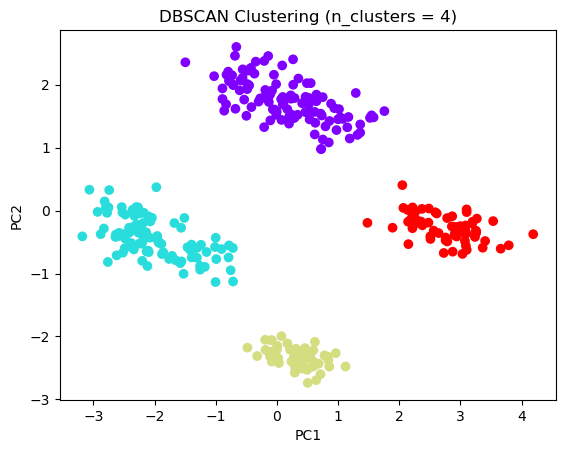

In [25]:
plt.scatter(df['PC1'], df['PC2'], c = db.labels_, cmap ='rainbow')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(f"DBSCAN Clustering (n_clusters = {db_clusters})")
plt.show()

In [27]:
!pip install xgboost

In [28]:
import xgboost
print(xgboost.__version__)

2.1.3


In [29]:
import numpy as np 
import xgboost as xgb
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

In [32]:
df = pd.read_csv(r"C:\Users\dell\Desktop\MyDocs\Docs\MK\penguins_size.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [33]:
#fix the nulls 
df["sex"] = df["sex"].replace(".", np.nan)
df["culmen_length_mm"].fillna(df["culmen_length_mm"].mean(), inplace=True)
df["culmen_depth_mm"].fillna(df["culmen_depth_mm"].mean(), inplace=True)
df["flipper_length_mm"].fillna(df["flipper_length_mm"].mean(), inplace=True)
df["body_mass_g"].fillna(df["body_mass_g"].mean(), inplace=True)
sex_counts = df["sex"].value_counts(normalize=True)

# distribute the value randomly
df["sex"] = df["sex"].apply(
    lambda x: np.random.choice(sex_counts.index, p=sex_counts.values) if pd.isnull(x) else x
)
print("\nafter the fix：")
df.head()
print("\ncheck the nulls：")
print(df.isnull())  # show the nulls
print("\nnumber of null in every row：")
print(df.isnull().sum())  # number of null in every row


after the fix：

check the nulls：
     species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0      False   False             False            False              False   
1      False   False             False            False              False   
2      False   False             False            False              False   
3      False   False             False            False              False   
4      False   False             False            False              False   
..       ...     ...               ...              ...                ...   
339    False   False             False            False              False   
340    False   False             False            False              False   
341    False   False             False            False              False   
342    False   False             False            False              False   
343    False   False             False            False              False   

     body_mass_g    sex  
0  

C:\Users\dell\AppData\Local\Temp\ipykernel_25108\1800317754.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["culmen_length_mm"].fillna(df["culmen_length_mm"].mean(), inplace=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_25108\1800317754.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

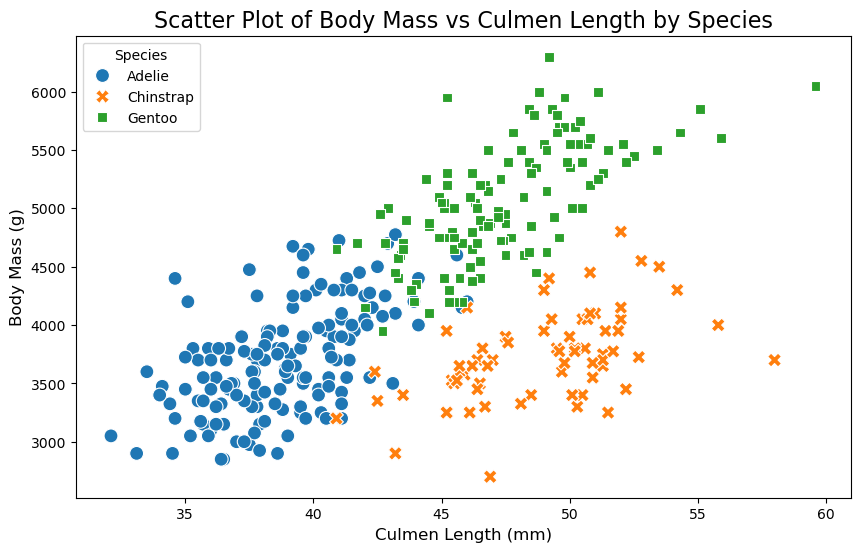

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="culmen_length_mm",  
    y="body_mass_g",
    hue="species",         
    style="species",      
    s=100                  
)

plt.title("Scatter Plot of Body Mass vs Culmen Length by Species", fontsize=16)
plt.xlabel("Culmen Length (mm)", fontsize=12)
plt.ylabel("Body Mass (g)", fontsize=12)
plt.legend(title="Species")
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_25108\2334918230.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


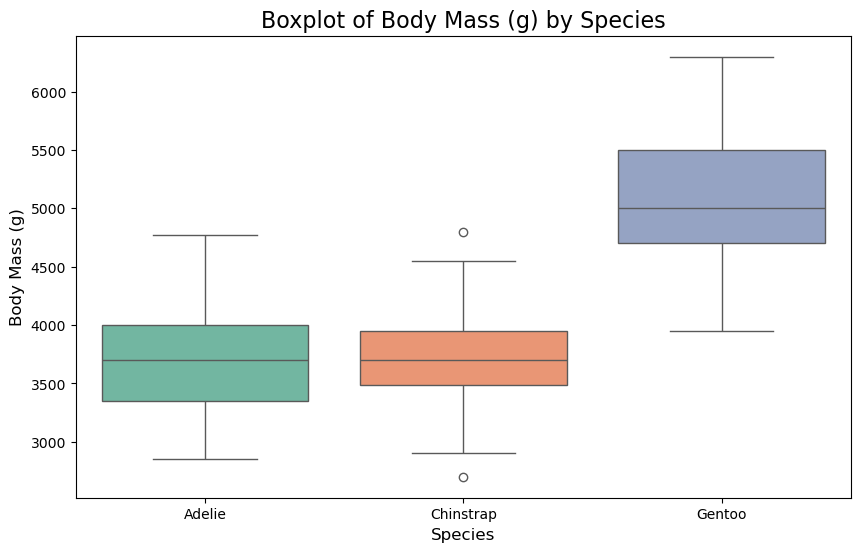

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x="species",        
    y="body_mass_g",    
    palette="Set2"
)


plt.title("Boxplot of Body Mass (g) by Species", fontsize=16)
plt.xlabel("Species", fontsize=12)
plt.ylabel("Body Mass (g)", fontsize=12)


plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_25108\2842940137.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


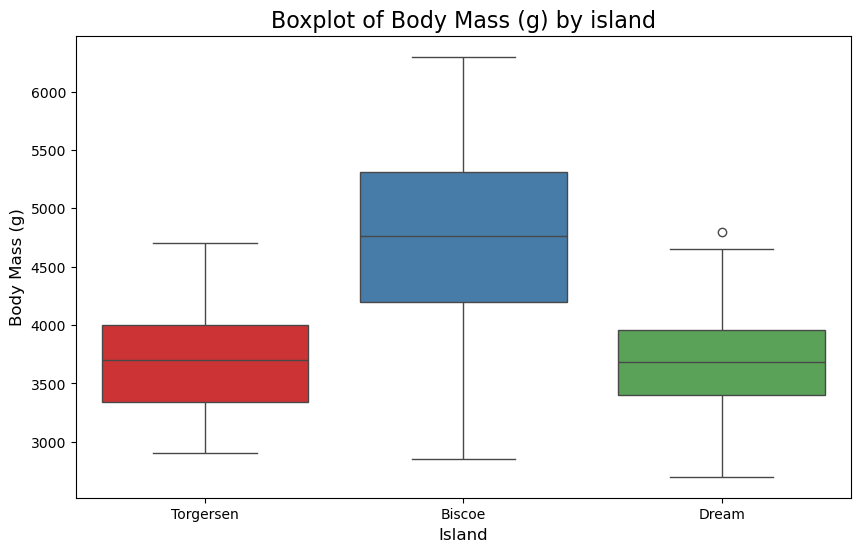

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x="island",        
    y="body_mass_g",   
    palette="Set1"      
)


plt.title("Boxplot of Body Mass (g) by island", fontsize=16)
plt.xlabel("Island", fontsize=12)
plt.ylabel("Body Mass (g)", fontsize=12)


plt.show()

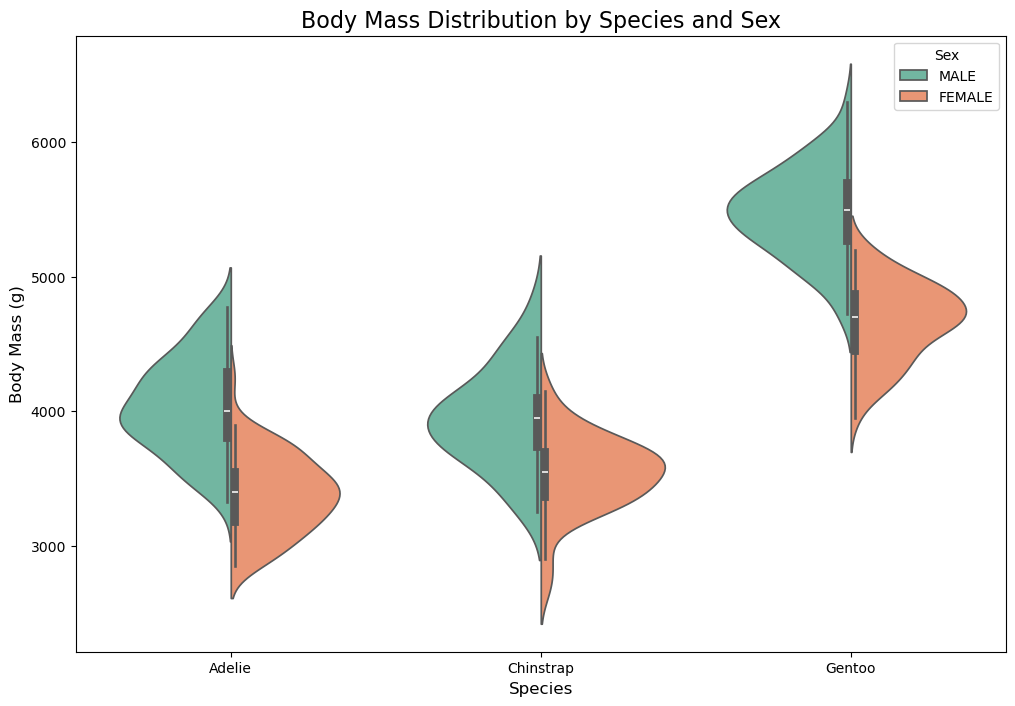

In [38]:
plt.figure(figsize=(12, 8))


sns.violinplot(
    data=df,
    x="species",           
    y="body_mass_g",      
    hue="sex",             
    split=True,            
    palette="Set2"
)


plt.title("Body Mass Distribution by Species and Sex", fontsize=16)
plt.xlabel("Species", fontsize=12)
plt.ylabel("Body Mass (g)", fontsize=12)
plt.legend(title="Sex")

plt.show()

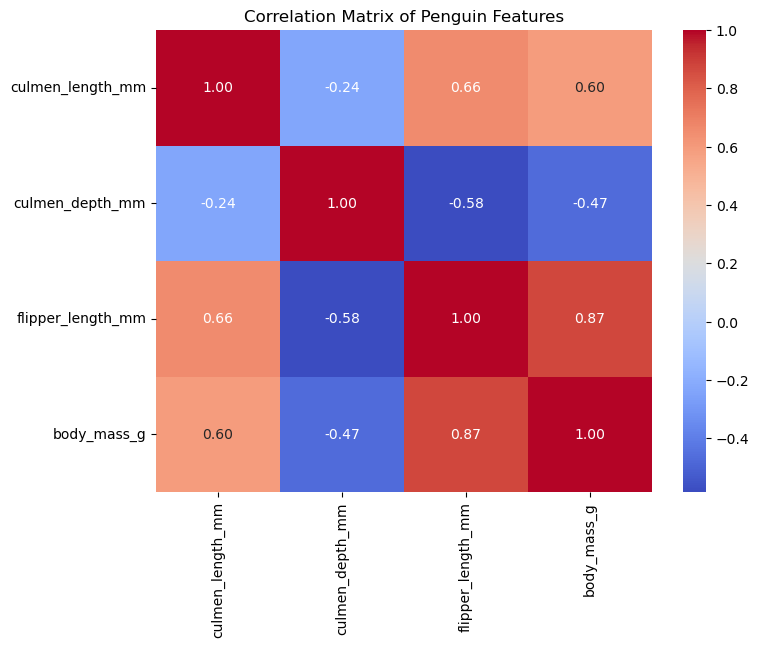

In [39]:
correlation_matrix = df[["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Penguin Features")
plt.show()

In [40]:
print(df.columns)


Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')


In [41]:
required_columns = ["species", "island", "sex"]
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    print(f"missinf columns：{missing_columns}")
else:
    print("all of them are exist")


all of them are exist


In [42]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=["body_mass_g"])
y = df["body_mass_g"]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
all_data = pd.concat([X_train, X_test], axis=0)
all_data = pd.get_dummies(all_data, columns=["species", "island", "sex"], drop_first=True)

In [45]:
X_train = all_data.iloc[:len(X_train), :]
X_test = all_data.iloc[len(X_train):, :]

In [46]:
xgb_model = xgb.XGBRegressor(
    n_estimators=100,  
    learning_rate=0.1,  
    max_depth=3, 
    random_state=42
)

xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [47]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
y_pred = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 101945.41570573341
R² Score: 0.8354543415231503


In [48]:
joblib.dump(xgb_model, "xgboost_penguin_body_mass_model.pkl")
print("model is saved!")

model is saved!


In [49]:
loaded_model = joblib.load("xgboost_penguin_body_mass_model.pkl")

In [50]:
new_data = pd.DataFrame([{
    "culmen_length_mm": 45.0,
    "culmen_depth_mm": 15.0,
    "flipper_length_mm": 210,
    "species_Chinstrap": 1,
    "species_Gentoo": 0,
    "island_Dream": 1,
    "island_Torgersen": 0,
    "sex_MALE": 1
}])

predicted_weight = loaded_model.predict(new_data)
print(f"Predicted Body Mass: {predicted_weight[0]} g")

Predicted Body Mass: 4288.77490234375 g


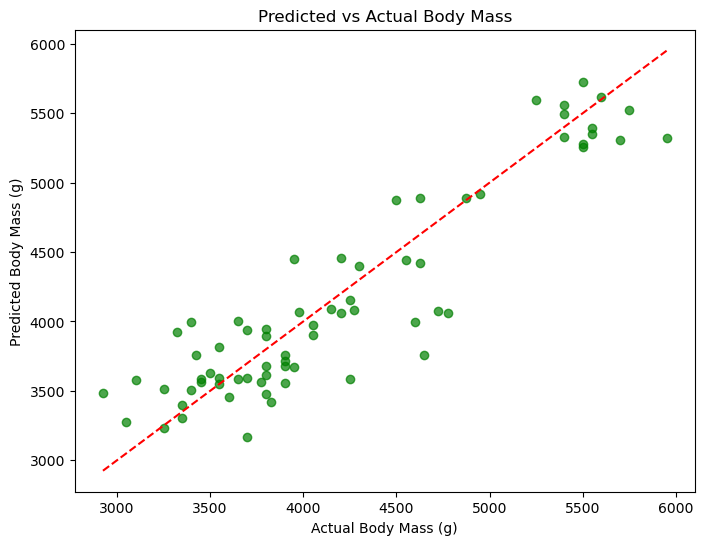

In [51]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color="green")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.title("Predicted vs Actual Body Mass")
plt.xlabel("Actual Body Mass (g)")
plt.ylabel("Predicted Body Mass (g)")
plt.show()

In [52]:
residuals = y_test - y_pred


In [53]:
# tranfer inf and -inf into NaN
residuals.replace([np.inf, -np.inf], np.nan, inplace=True)

# delete NaN(if needed)
residuals = residuals.dropna()

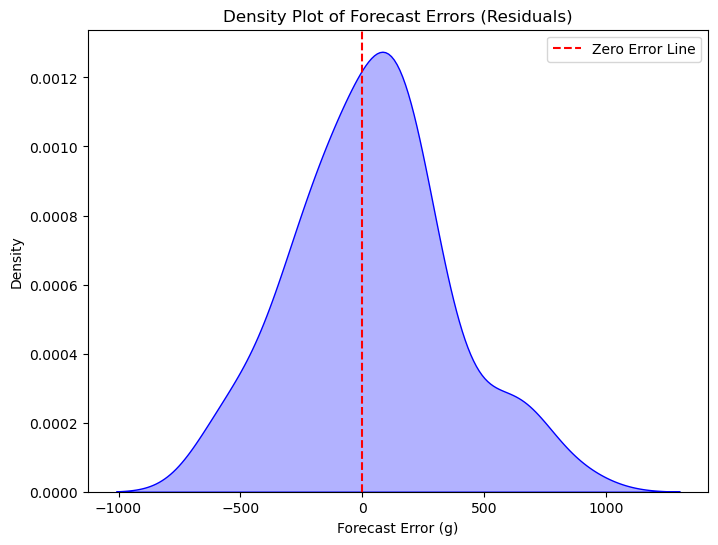

In [54]:
plt.figure(figsize=(8, 6))
sns.kdeplot(residuals, color="blue", fill=True, alpha=0.3)
plt.axvline(x=0, color="red", linestyle="--", label="Zero Error Line")
plt.title("Density Plot of Forecast Errors (Residuals)")
plt.xlabel("Forecast Error (g)")
plt.ylabel("Density")
plt.legend()
plt.show()

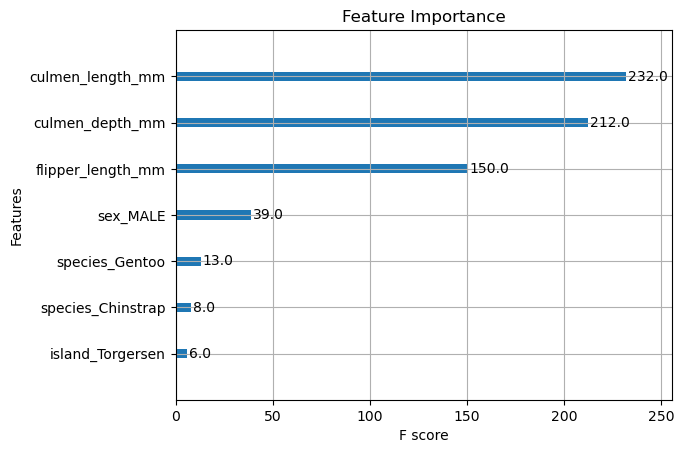

In [55]:
xgb.plot_importance(xgb_model, importance_type="weight", max_num_features=10)
plt.title("Feature Importance")
plt.show()

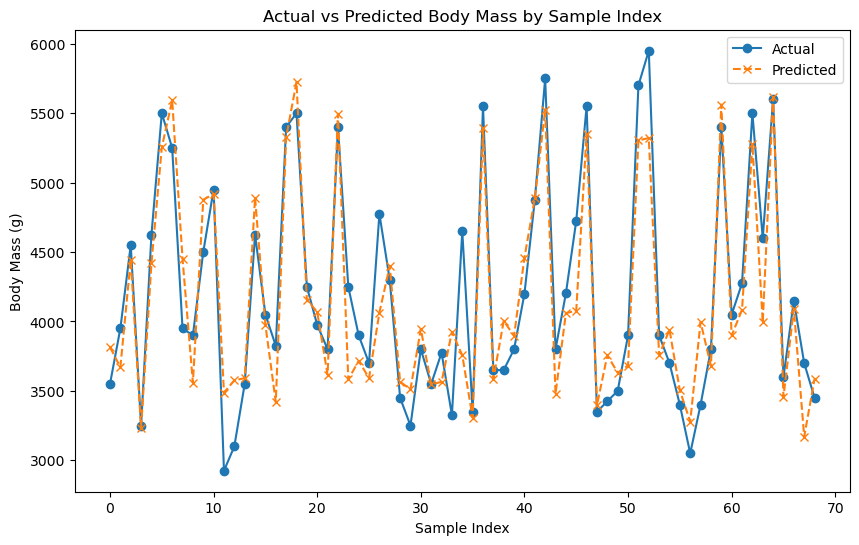

In [56]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label="Actual", marker="o", linestyle="-")
plt.plot(range(len(y_pred)), y_pred, label="Predicted", marker="x", linestyle="--")
plt.title("Actual vs Predicted Body Mass by Sample Index")
plt.xlabel("Sample Index")
plt.ylabel("Body Mass (g)")
plt.legend()
plt.show()

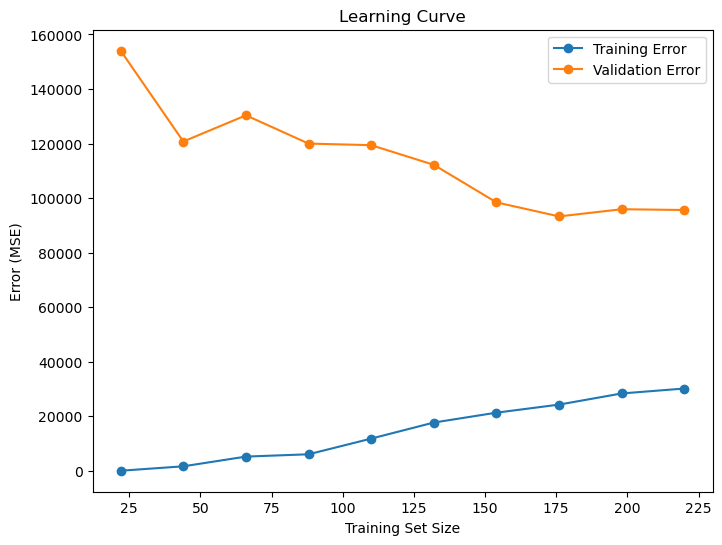

In [57]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    xgb_model, X_train, y_train, cv=5, scoring="neg_mean_squared_error", train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label="Training Error", marker="o")
plt.plot(train_sizes, test_scores_mean, label="Validation Error", marker="o")
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Error (MSE)")
plt.legend()
plt.show()

In [58]:
from sklearn.metrics import classification_report


y_test = ["FEMALE", "MALE", "FEMALE", "MALE", "FEMALE"]  
y_pred = ["FEMALE", "MALE", "MALE", "MALE", "FEMALE"]   


report = classification_report(y_test, y_pred, target_names=["FEMALE", "MALE"])
print(report)

              precision    recall  f1-score   support

      FEMALE       1.00      0.67      0.80         3
        MALE       0.67      1.00      0.80         2

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5

